$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

In [65]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [66]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [67]:
X_data = pd.DataFrame(X, columns=breast_cancer_wisconsin_original.variables.name[:-1])  # Exclude target variable
y_data = pd.DataFrame(y, columns=['Class'])

data = pd.concat([X_data, y_data], axis=1)
print(data)

     Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0                   NaN                5                        1   
1                   NaN                5                        4   
2                   NaN                3                        1   
3                   NaN                6                        8   
4                   NaN                4                        1   
..                  ...              ...                      ...   
694                 NaN                3                        1   
695                 NaN                2                        1   
696                 NaN                5                       10   
697                 NaN                4                        8   
698                 NaN                4                        8   

     Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                           1                  1                            2   
1        

3. Perform Decision Tree similar to the lecture

---
**Evaluation**

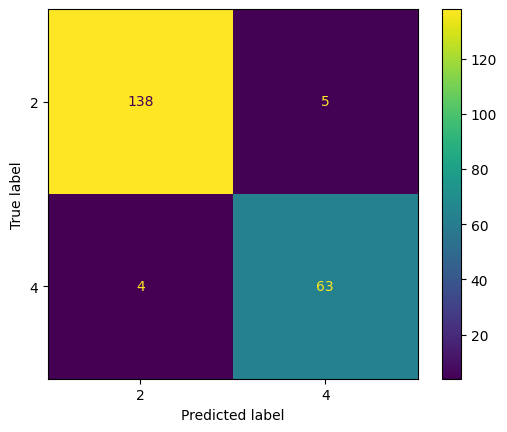

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Class']), data['Class'], test_size=0.3, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

model = DecisionTreeClassifier()

model.fit(X_train_encoded,y_train)
base_pred = model.predict(X_test)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

cmd.plot()
plt.show()  

In [69]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       143
           4       0.93      0.94      0.93        67

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [70]:
model.feature_importances_

array([0.        , 0.09378447,        nan, 0.30280805,        nan,
       0.00777096, 0.08872075, 0.00204116, 0.05501588, 0.00064962])

In [71]:
scores = cross_val_score(model, X_train_encoded, y_train, cv=5)
print("Cross-validation scores:", scores)

y_pred = model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.95918367 0.93877551 0.92857143 0.93877551 0.91752577]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       143
           4       0.93      0.94      0.93        67

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



---
**Visualize the Tree**

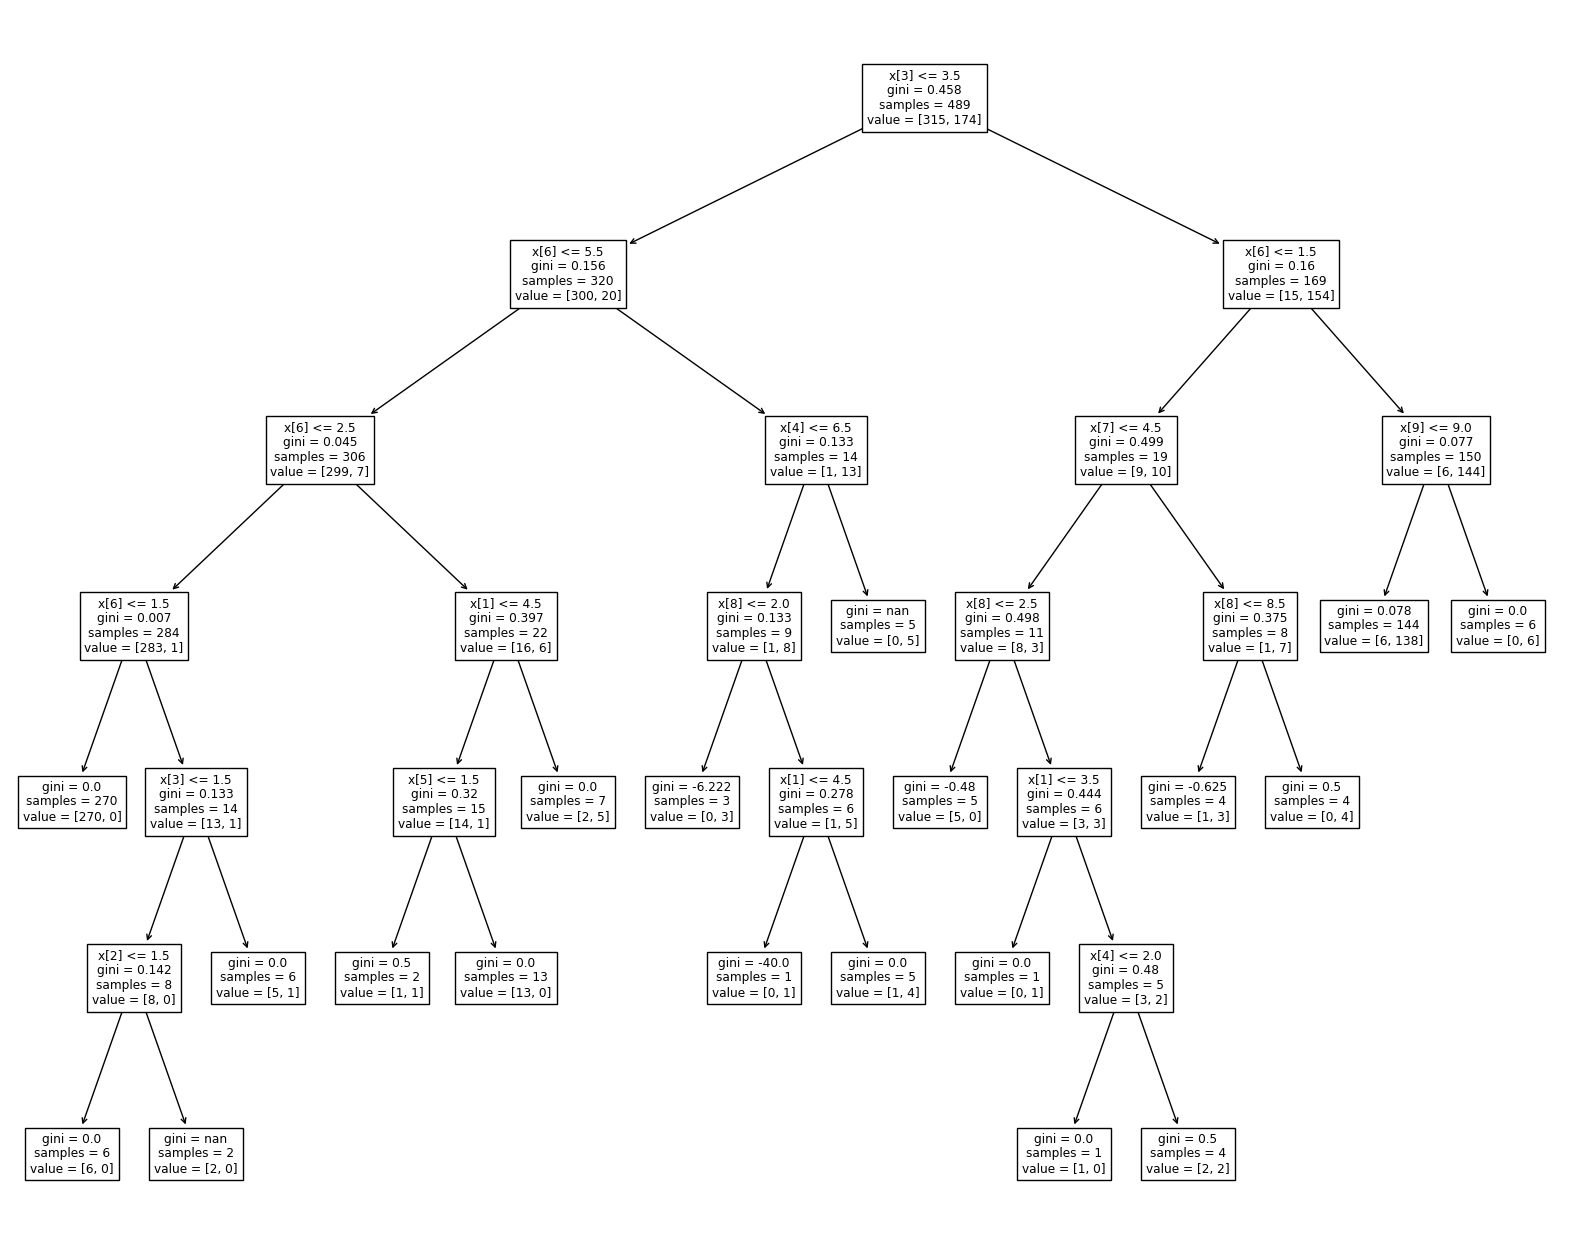

In [72]:
plt.figure(figsize=(20,16))
plot_tree(model);

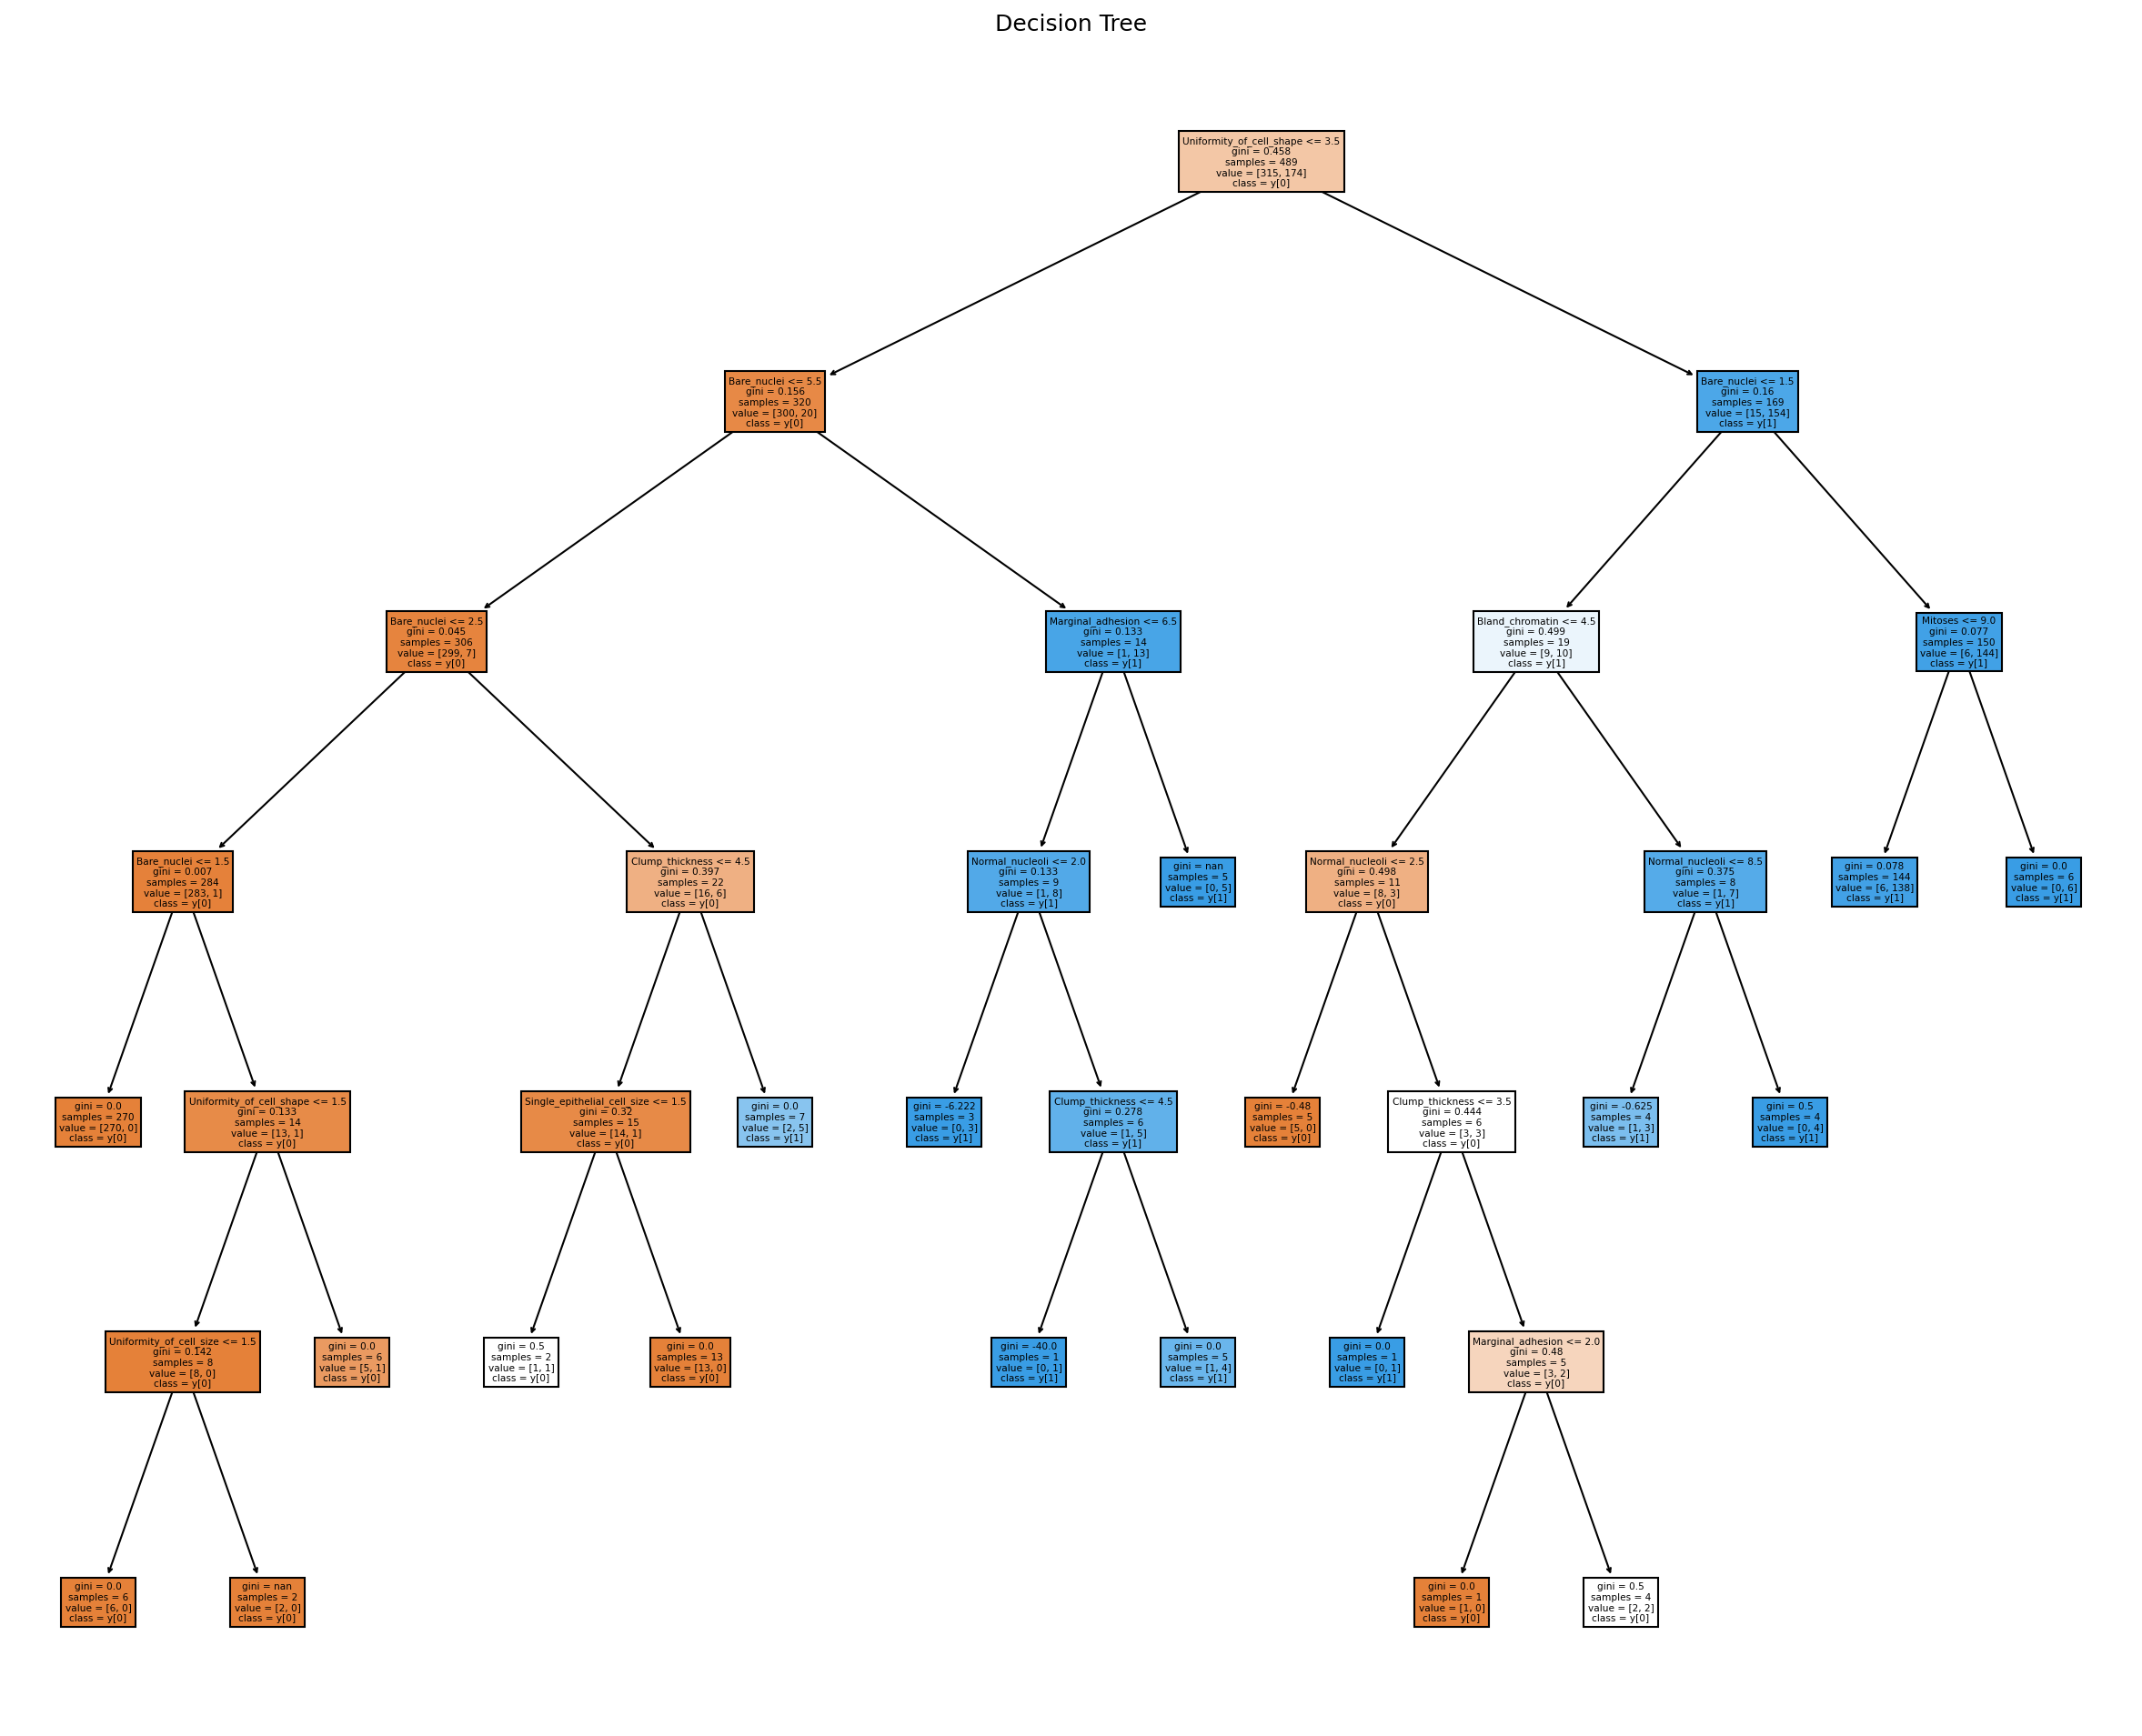

In [73]:
plt.figure(figsize=(20, 16),dpi=150)
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=True)
plt.title('Decision Tree')
plt.show()

**Reporting Model Results**

In [74]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')

    feature_names = data.columns
    
    print('\
')
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=feature_names)

In [75]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           2       0.96      0.94      0.95       143
           4       0.89      0.93      0.91        67

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210






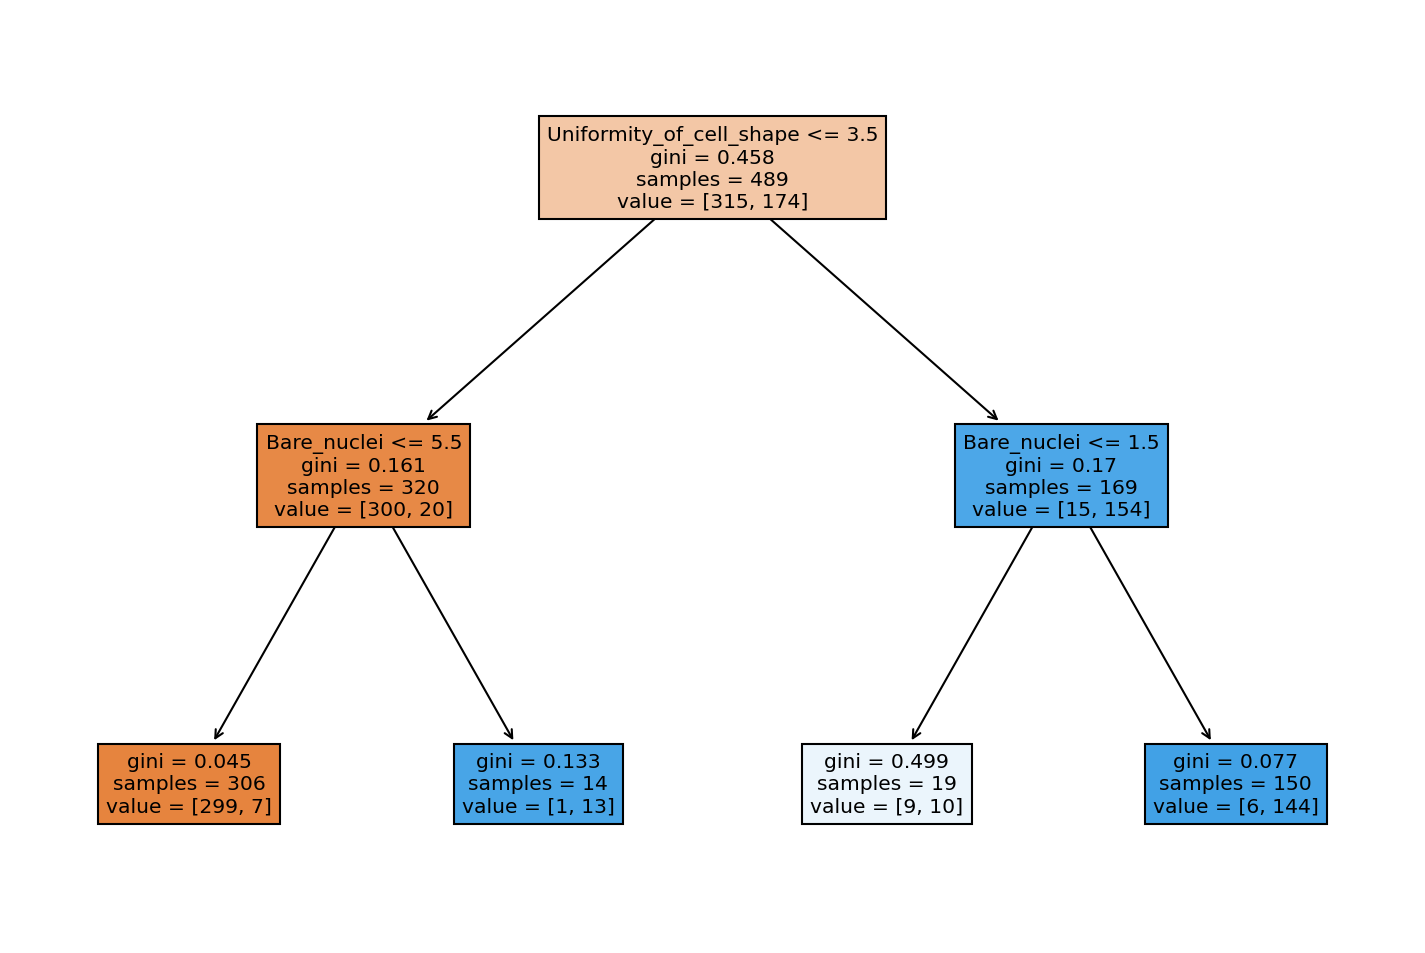

In [76]:
report_model(pruned_tree)


In [77]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           2       0.96      0.94      0.95       143
           4       0.89      0.93      0.91        67

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210






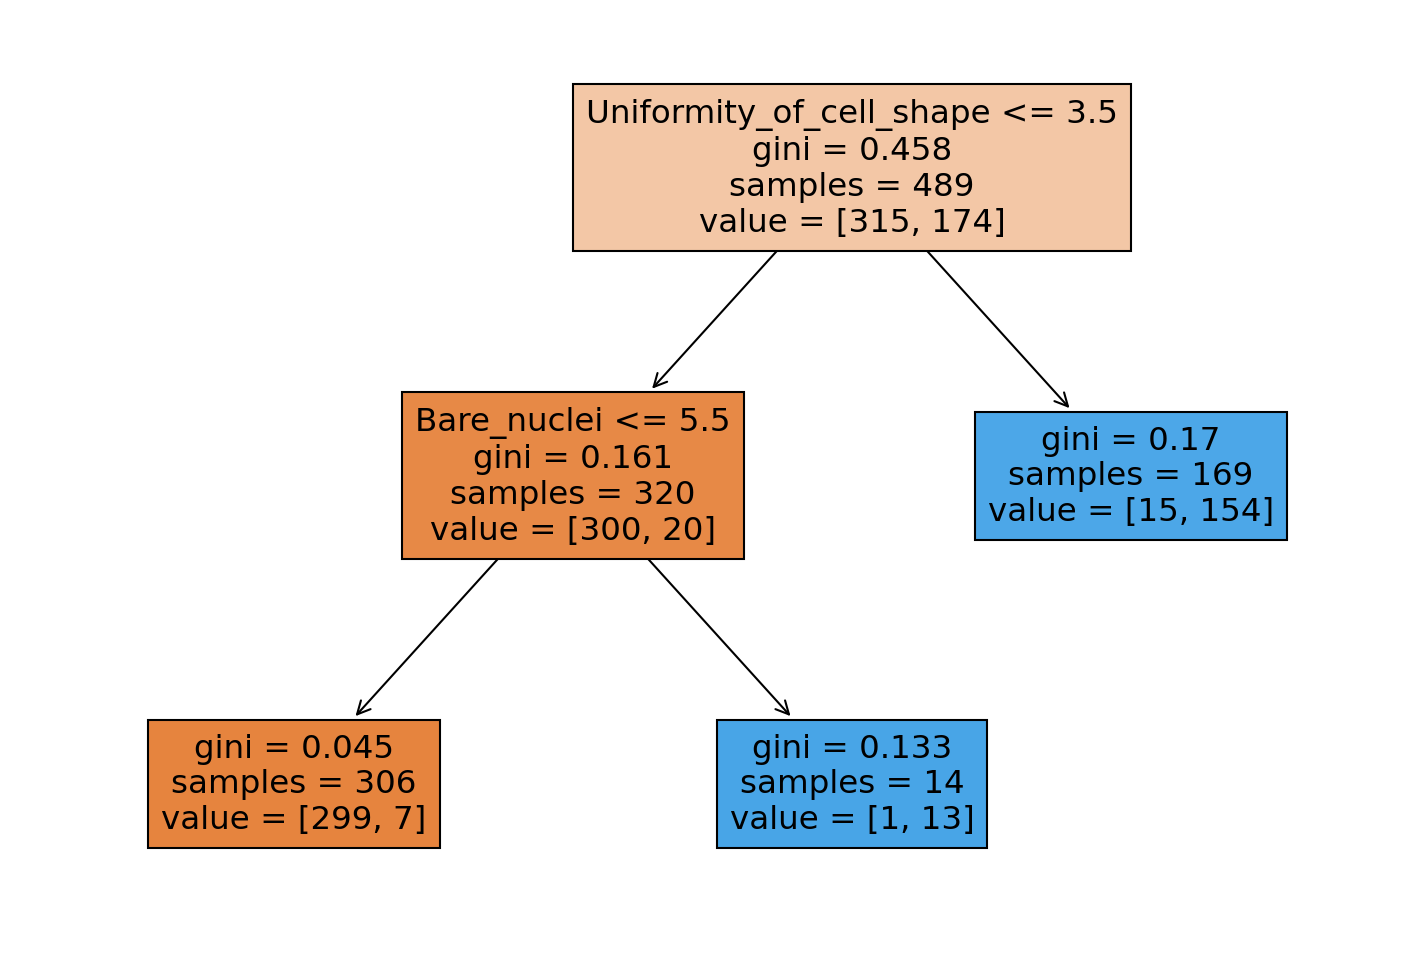

In [78]:
report_model(pruned_tree)

In [79]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           2       0.94      0.97      0.95       143
           4       0.92      0.87      0.89        67

    accuracy                           0.93       210
   macro avg       0.93      0.92      0.92       210
weighted avg       0.93      0.93      0.93       210






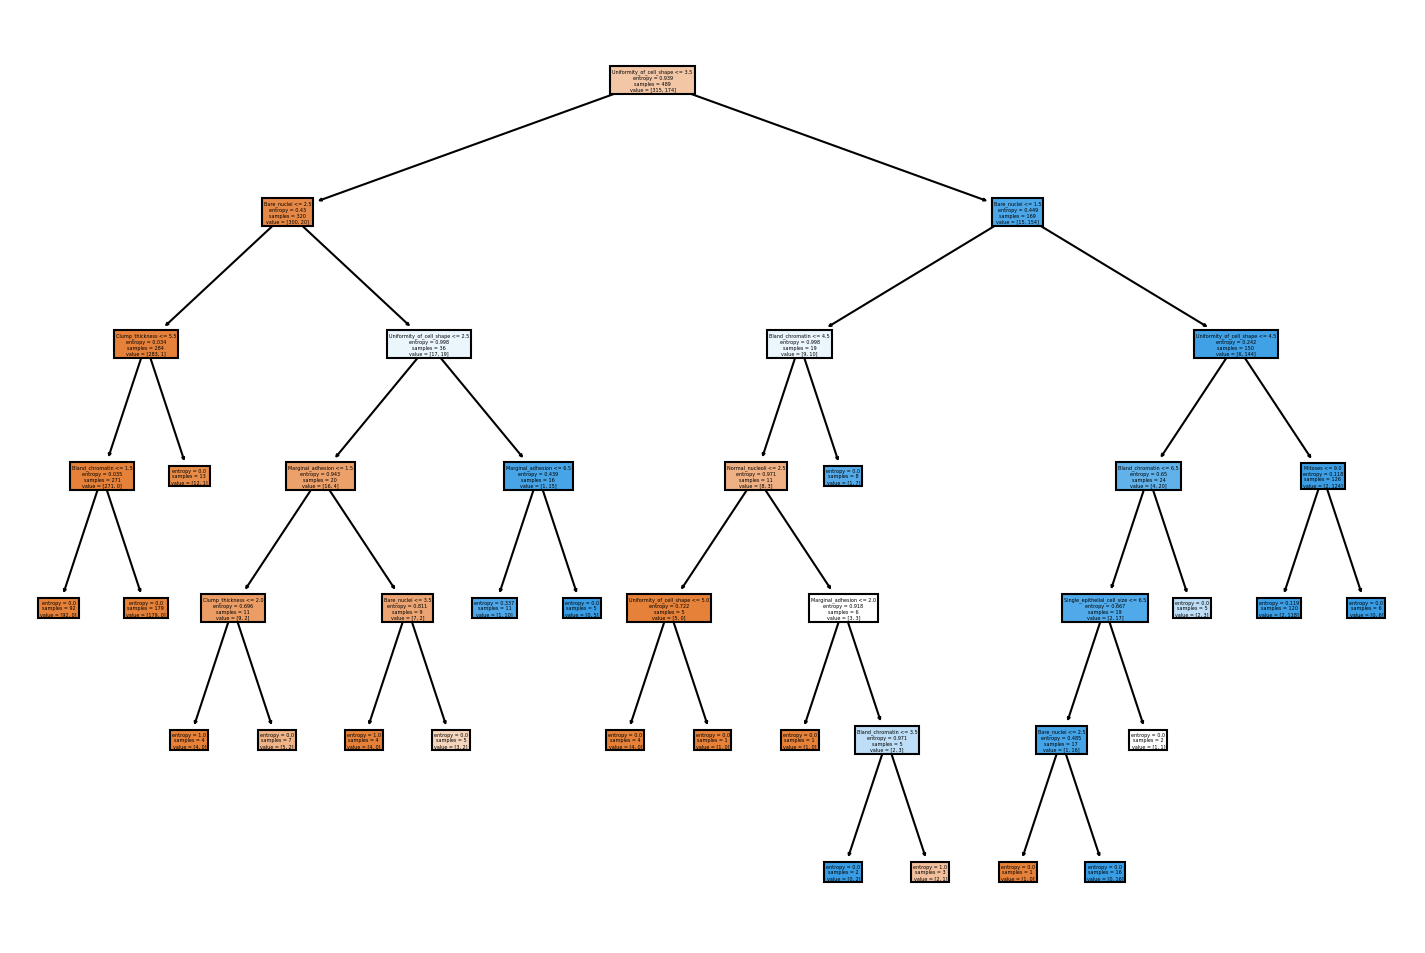

In [80]:
report_model(entropy_tree)

---